In [15]:
import pandas as pd 
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('train_cleaned_df.csv')

In [3]:
# Extracting year and month from the date 
df['Year']=df['Date'].apply(lambda x:int(str(x)[0:4]))
df['Month']=df['Date'].apply(lambda x:int(str(x)[5:7]))
df.drop(['Date'],axis=1,inplace=True)

In [4]:
df.dtypes

Store                          int64
DayOfWeek                      int64
Sales                        float64
Customers                    float64
Open                           int64
Promo                          int64
StateHoliday                   int64
SchoolHoliday                  int64
StoreType                      int64
Assortment                     int64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                  int64
WeekDays                       int64
WeekEnds                       int64
BeginningOfMonth               int64
MidOfMonth                     int64
EndOdMonth                     int64
Year                           int64
Month                          int64
dtype: object

In [11]:
X=df.drop(['Sales'],axis=1)
y=df[['Sales']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
models={
    'random_forest_regressor':RandomForestRegressor(n_estimators=100,random_state=42),
    'decision_tree_regressor':DecisionTreeRegressor(random_state=42),
    'gradient_boosting_regresor':GradientBoostingRegressor(random_state=42),
    'kneighbors_regressor':KNeighborsRegressor(),
    'Linear_regressor':LinearRegression()    
}

/Users/debasishguru/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


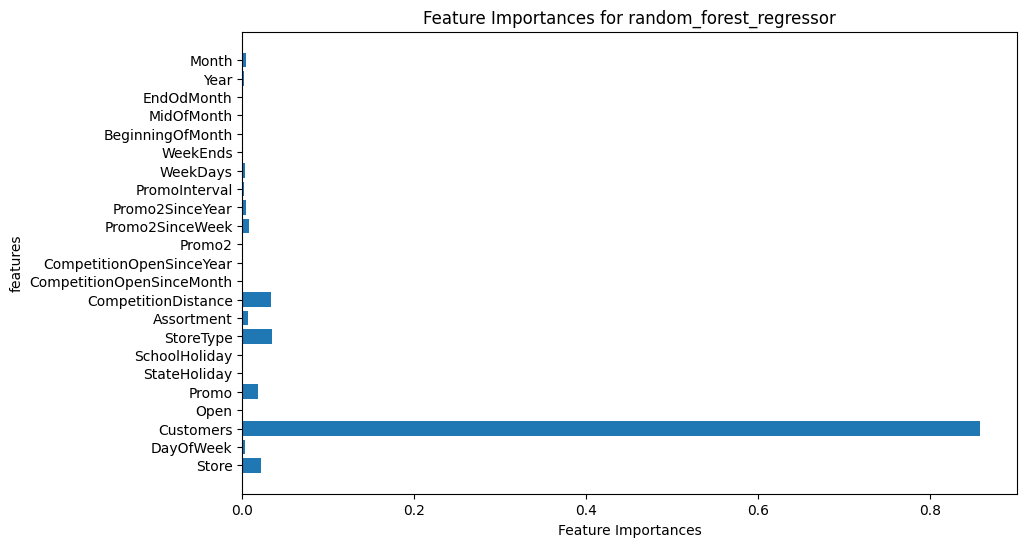

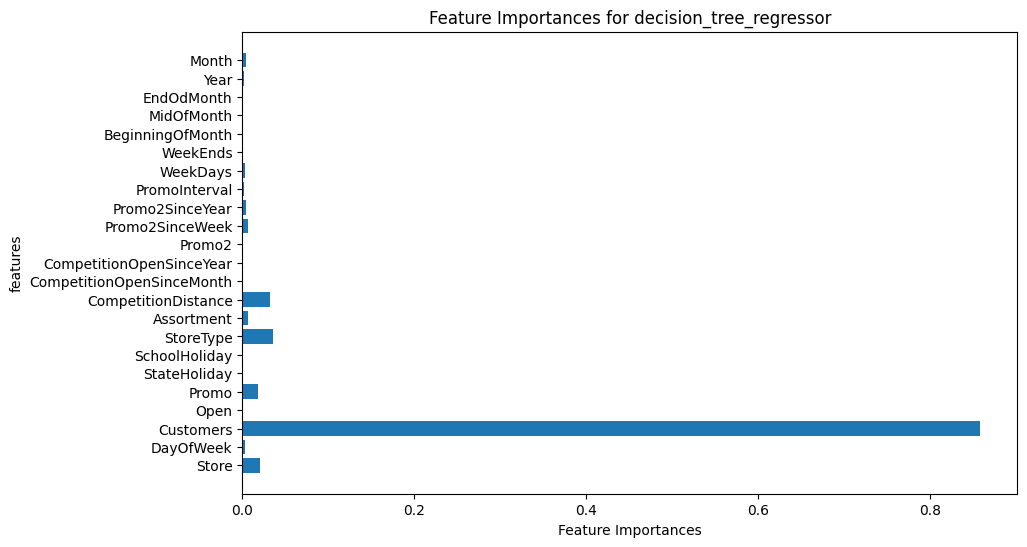

/Users/debasishguru/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


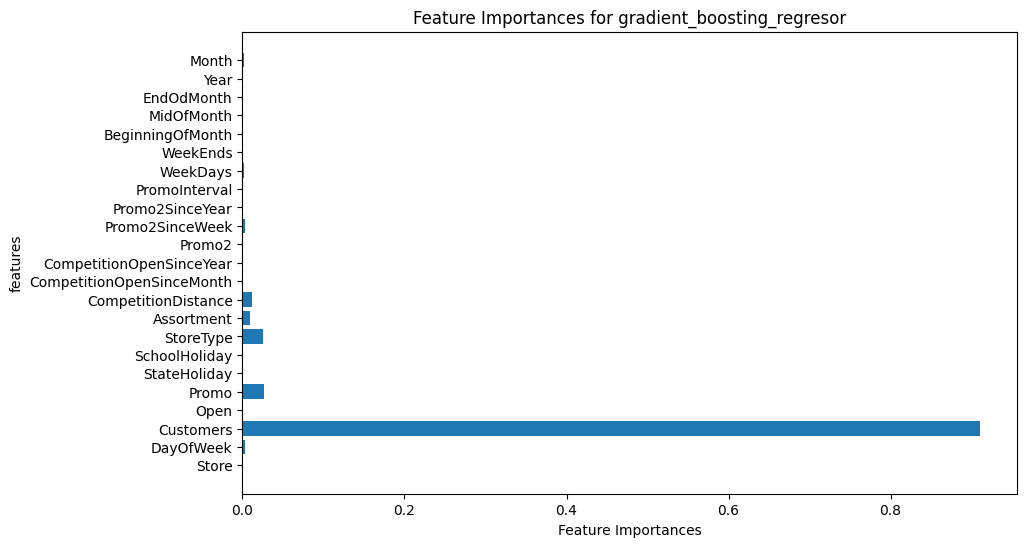

Model kneighbors_regressor does not provide the feature importances 
Model Linear_regressor does not provide the feature importances 


In [13]:
feature_importance_dict={}
for name,model in models.items():
    model.fit(X_train,y_train)
    # Feature importance for the models
    if hasattr(model,'feature_importances_'):
        feature_importances=model.feature_importances_
        feature_importance_dict[name]=feature_importances
         # Visualization of feture importances
        plt.figure(figsize=(10,6))
        plt.barh(X_train.columns,feature_importances)
        plt.xlabel('Feature Importances')
        plt.ylabel('features')
        plt.title(f'Feature Importances for {name}')
        plt.show()
    else:
        print(f'Model {name} does not provide the feature importances ')

In [20]:
# Make prediction
prediction=model.predict(X_test)
# Confidence interval 
confidence_interval=np.std(prediction)
print(f'Confidence interval for {name} :{confidence_interval}')
# Evaluate the model 
mse=mean_squared_error(y_test,prediction)
print(f'mean squared error {name} : {mse}')

Confidence interval for Linear_regressor :0.9345094373808412
mean squared error Linear_regressor : 0.13028638250835803
